In [51]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [2]:
(X_train, y_train),(X_test,y_test)= keras.datasets.mnist.load_data()
#loads train and test set of data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
X_train.shape
#shows pixel of image

(60000, 28, 28)

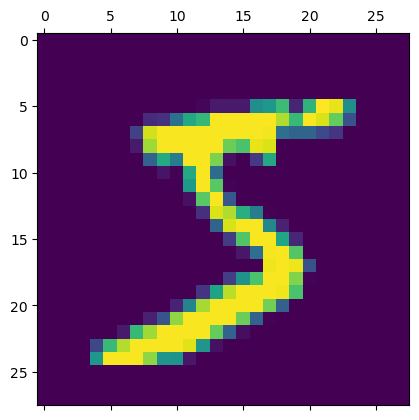

In [41]:
plt.matshow(X_train[0])

In [15]:
y_train[0]

5

In [32]:
#scaling
X_train=X_train/255
X_test=X_test/255

In [35]:
X_trainFlattened = X_train.reshape(len(X_train),28*28)
X_testFlattened = X_test.reshape(len(X_test),28*28)

In [36]:
X_testFlattened.shape

(10000, 784)

In [68]:
model=keras.Sequential([
    keras.layers.Dense(300,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_trainFlattened,y_train,epochs=10)

K:\anaconda_py\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8937 - loss: 0.3764
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9723 - loss: 0.0944
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9820 - loss: 0.0594
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9880 - loss: 0.0393
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9915 - loss: 0.0286
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9933 - loss: 0.0218
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9953 - loss: 0.0153
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9963 - loss: 0.0120
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9968 - loss: 0.0109
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9968 - loss: 0.0093


In [69]:
model.evaluate(X_testFlattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.1010


[0.08727999776601791, 0.9783999919891357]

In [71]:
Pixelpredicted = model.predict(X_testFlattened)
y_pixelPredict_labels=[np.argmax(i) for i in Pixelpredicted]
y_pixelPredict_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [72]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pixelPredict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    3,    0,    0,    1,    4,    1,    1,    0],
       [   0, 1127,    3,    0,    0,    0,    2,    1,    2,    0],
       [   4,    1, 1009,    4,    5,    0,    1,    3,    4,    1],
       [   0,    0,    9,  991,    0,    2,    0,    4,    0,    4],
       [   0,    0,    5,    0,  971,    1,    1,    1,    0,    3],
       [   2,    0,    1,   19,    1,  853,    6,    3,    6,    1],
       [   3,    3,    2,    1,    5,    2,  941,    0,    1,    0],
       [   1,    3,   11,    1,    0,    0,    0, 1005,    2,    5],
       [   3,    0,    9,    6,    5,    1,    0,    5,  941,    4],
       [   3,    2,    0,    4,   17,    1,    0,    5,    1,  976]])>

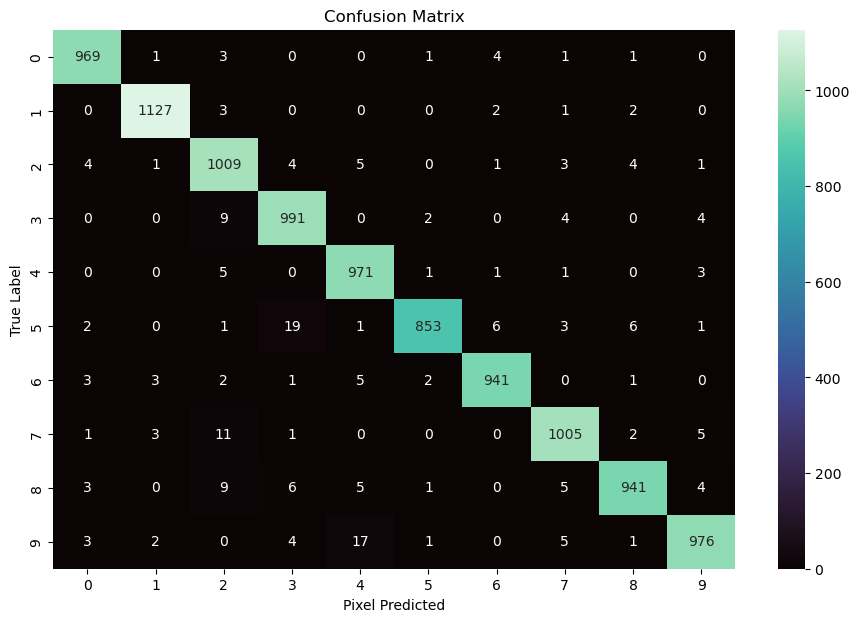

In [73]:
plt.figure(figsize=(11, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap=sn.color_palette('mako', as_cmap=True))
plt.xlabel("Pixel Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Kovarthana's Pixel Prediction 3766: 3


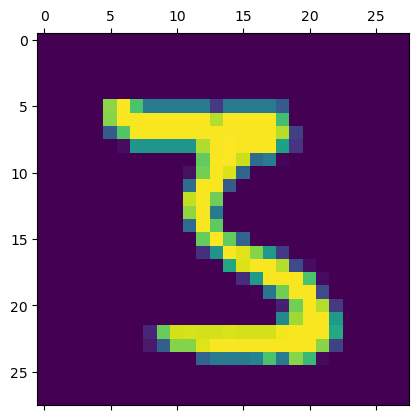

In [75]:
for x in np.random.randint(0, len(X_test), size=9):
    plt.matshow(X_test[x])  
    Pixel_predicted = model.predict(X_testFlattened[x].reshape(1, -1))  
    predicted_label = np.argmax(Pixel_predicted[0]) 
    print(f"Kovarthana's Pixel Prediction {x}: {predicted_label}")
    plt.show()
    break